In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('credit.csv')

In [4]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [5]:
list(data.columns)

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [6]:
data.shape

(100000, 28)

In [7]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [8]:
data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [10]:
print(data.isnull().sum())

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [11]:
data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

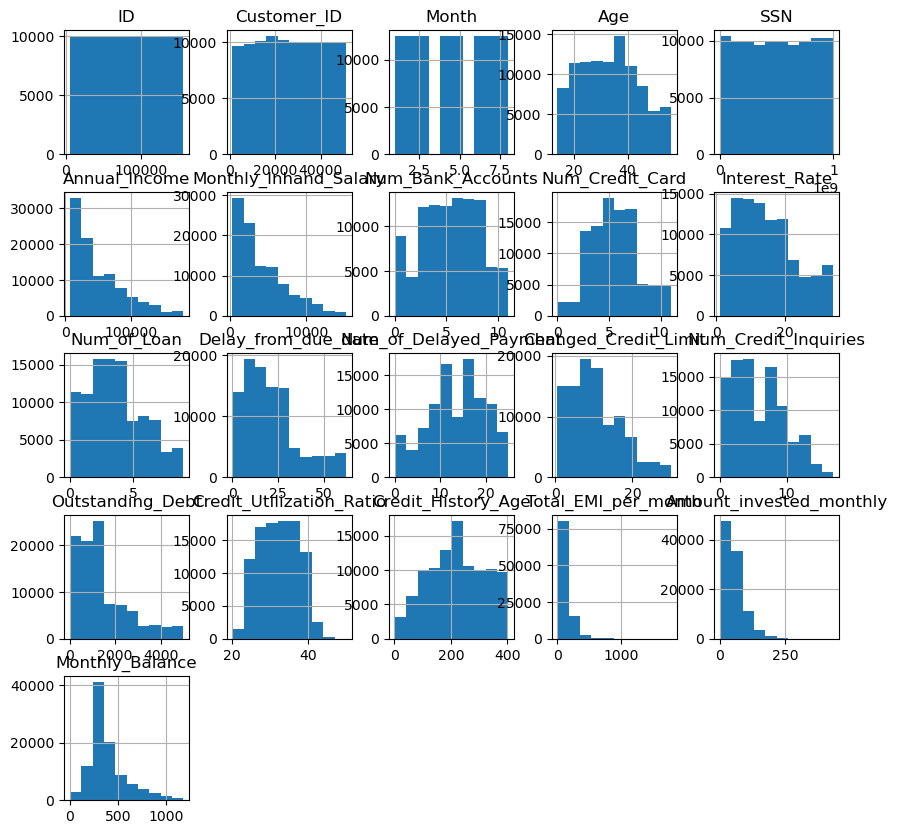

In [12]:
data.hist(figsize=(10, 10))
plt.show()

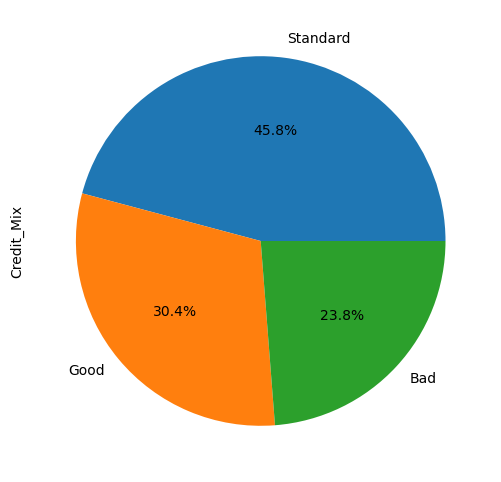

In [13]:
plt.figure(1, figsize=(6,6))
data['Credit_Mix'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

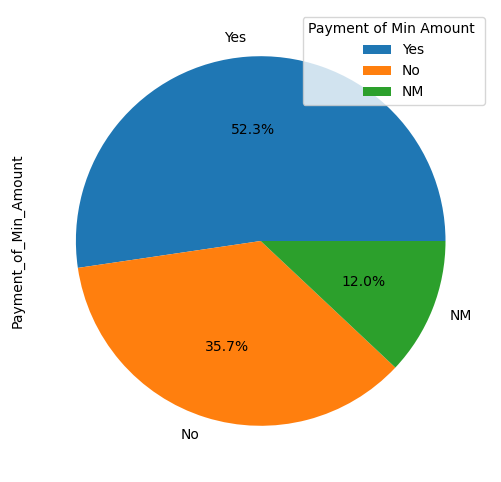

In [14]:
plt.figure(1, figsize=(6,6))
data['Payment_of_Min_Amount'].value_counts().plot.pie(autopct="%1.1f%%")
plt.legend(title = "Payment of Min Amount ")
plt.show()

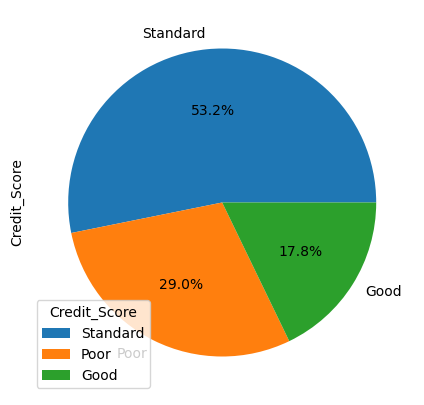

In [15]:
plt.figure(1, figsize=(5,5))
data['Credit_Score'].value_counts().plot.pie(autopct="%1.1f%%")
plt.legend(title = "Credit_Score")
plt.show()

In [16]:
data['Credit_Score'].value_counts(normalize=True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

In [17]:
credit_mix_count = data['Credit_Mix'].value_counts(dropna = False)
credit_mix_count

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

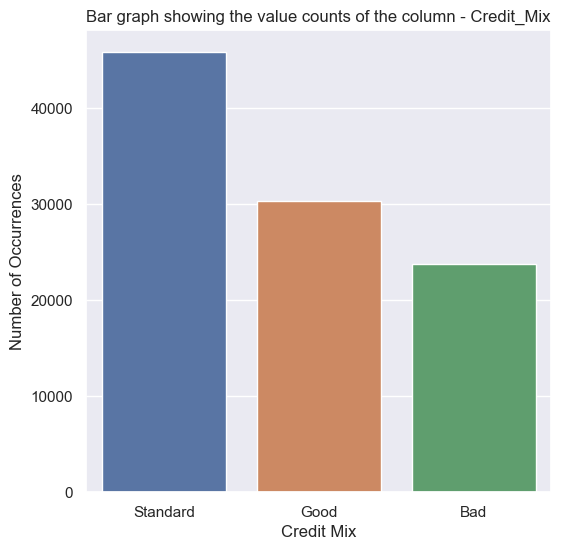

In [18]:
sns.set(rc = {'figure.figsize': (6, 6)})
sns.barplot(x=credit_mix_count.index, y=credit_mix_count.values)
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Credit Mix', fontsize = 12)
plt.show()

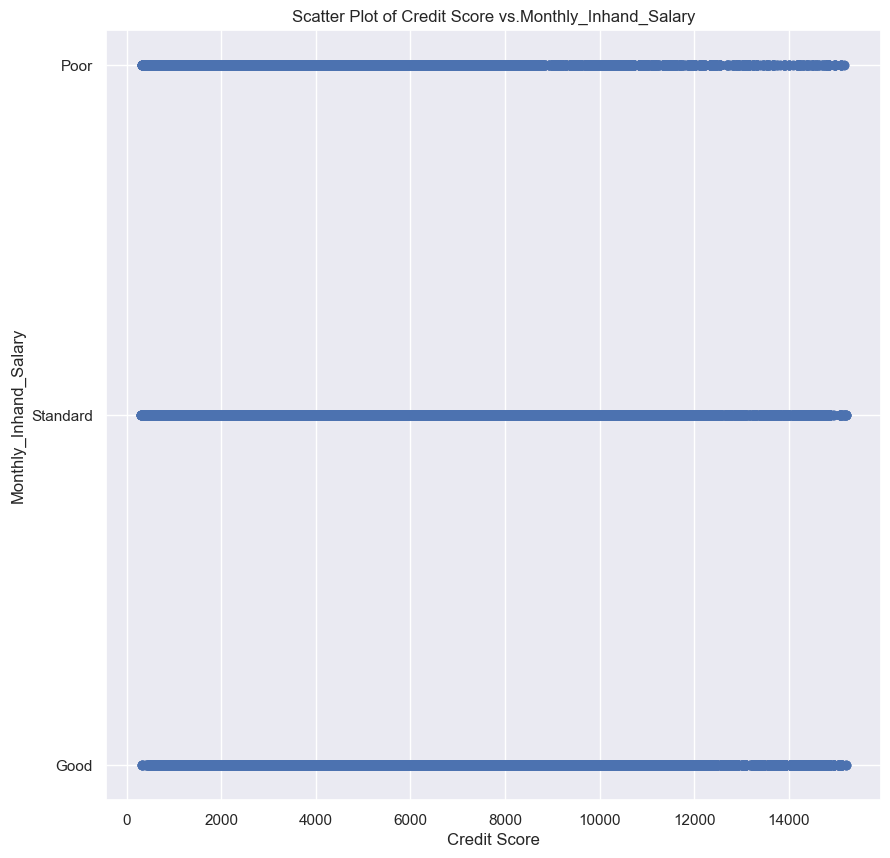

In [19]:
plt.figure(2, figsize=(10,10))
plt.scatter(data['Monthly_Inhand_Salary'], data['Credit_Score'])
plt.ylabel('Monthly_Inhand_Salary')
plt.xlabel('Credit Score')
plt.title('Scatter Plot of Credit Score vs.Monthly_Inhand_Salary')
plt.show()

In [20]:
# Drop columns 'ID' and 'Name' from the 'data' DataFrame
data = data.drop(columns=['ID', 'Name'])

In [21]:
data

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,3392,2,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,37932,5,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,37932,6,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,37932,7,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [22]:
data.columns

Index(['Customer_ID', 'Month', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

/var/folders/5j/3c460rfx4ksby_l3t2qfs3bc0000gn/T/ipykernel_5104/4039498678.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Monthly_Inhand_Salary']);


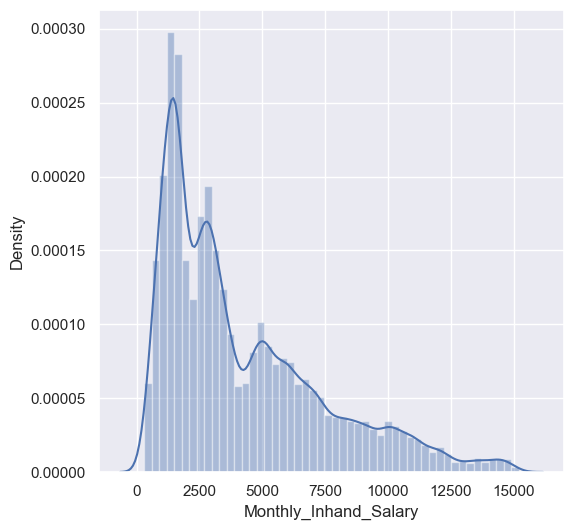

In [23]:
sns.distplot(data['Monthly_Inhand_Salary']);

/var/folders/5j/3c460rfx4ksby_l3t2qfs3bc0000gn/T/ipykernel_5104/4043167091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Total_EMI_per_month']);


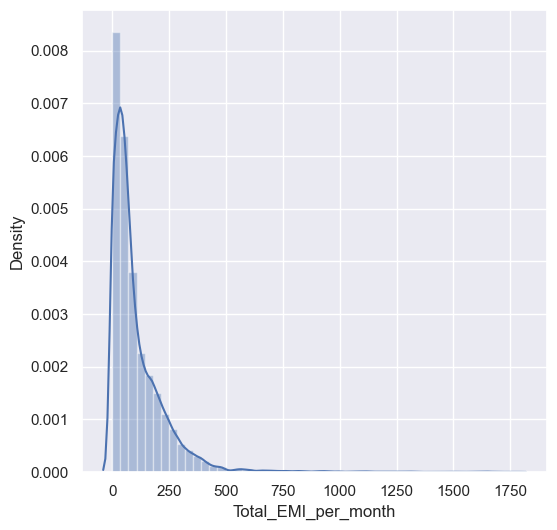

In [24]:
sns.distplot(data['Total_EMI_per_month']);

/var/folders/5j/3c460rfx4ksby_l3t2qfs3bc0000gn/T/ipykernel_5104/3025481349.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='viridis', annot=True, fmt='.2f')


<Axes: >

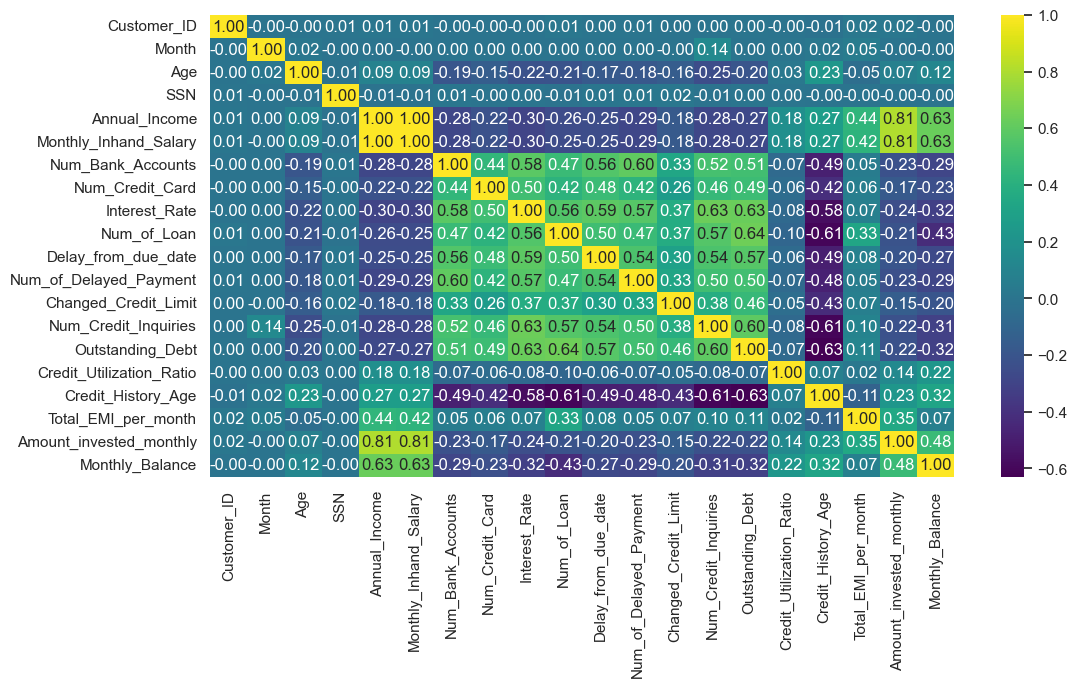

In [25]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(), cmap='viridis', annot=True, fmt='.2f')

In [26]:
data = data.drop(columns = ['SSN', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Changed_Credit_Limit', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'])

In [27]:
data.columns

Index(['Customer_ID', 'Month', 'Occupation', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

<Axes: ylabel='Delay_from_due_date'>

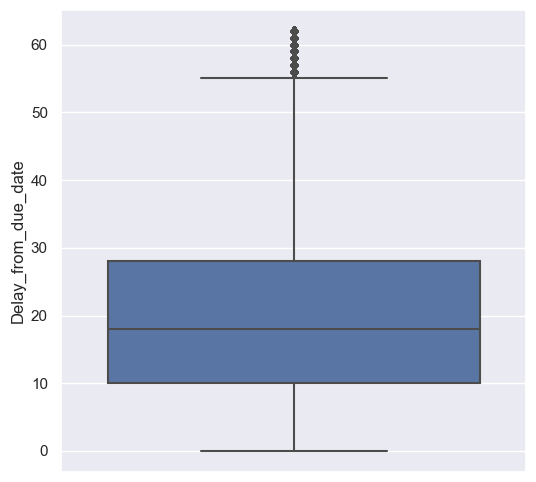

In [28]:
sns.boxplot(y = 'Delay_from_due_date',data=data)

<Axes: ylabel='Delay_from_due_date'>

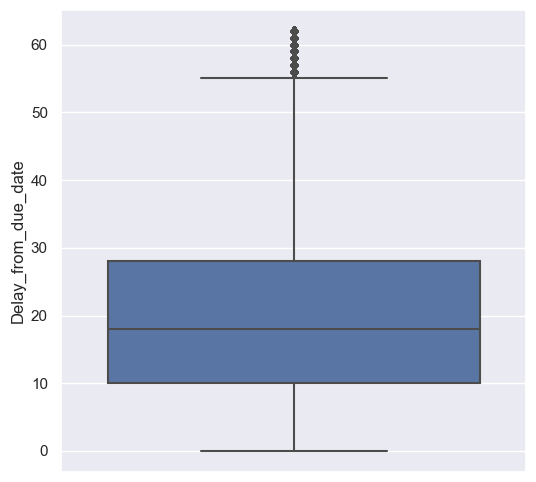

In [29]:
sns.boxplot(y = 'Delay_from_due_date',data=data)

<Axes: ylabel='Num_Credit_Inquiries'>

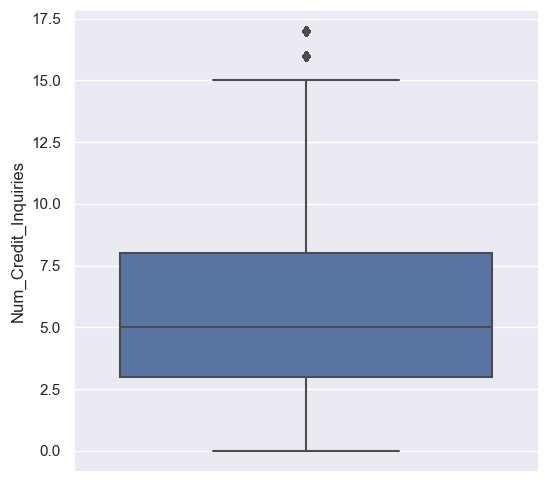

In [30]:
sns.boxplot(y = 'Num_Credit_Inquiries',data=data)

<Axes: ylabel='Outstanding_Debt'>

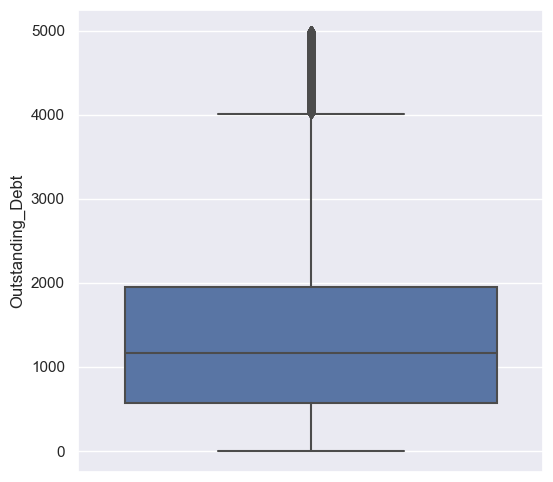

In [31]:
sns.boxplot(y = 'Outstanding_Debt',data=data)

<Axes: ylabel='Credit_History_Age'>

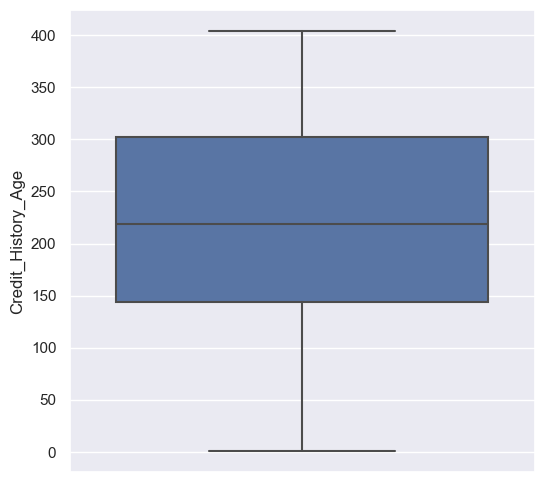

In [32]:
sns.boxplot(y = 'Credit_History_Age',data=data)

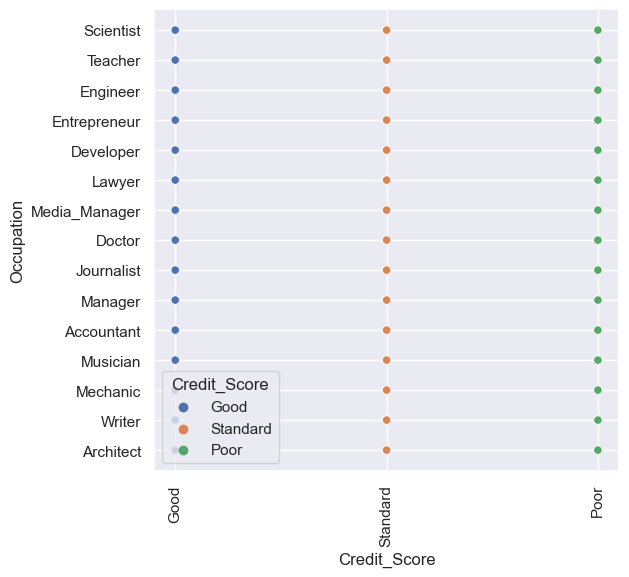

In [33]:
sns.scatterplot(x= 'Credit_Score', y= 'Occupation', hue= 'Credit_Score', data= data)
plt.title= 'Scatterplot of Credit Score and Occupation grouped by Fulfillment'
plt.ylabel= 'Occupation'
plt.xlabel= 'Credit Score'
plt.xticks(rotation= 90)
plt.show()

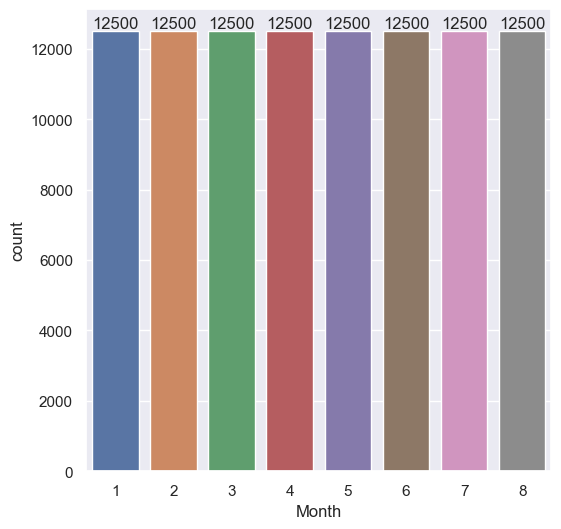

In [34]:
ax= sns.countplot(x='Month', data= data)
ax.bar_label(ax.containers[0])
plt.show()

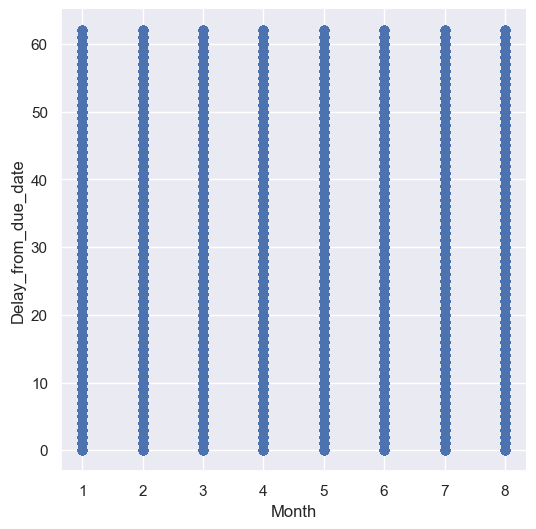

In [35]:
data.plot(kind='scatter', x='Month', y='Delay_from_due_date', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
X = data.drop(columns=['Credit_Score','Customer_ID'])
y = data['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80000, 12), (20000, 12), (80000,), (20000,))

In [38]:
list(data.columns)

['Customer_ID',
 'Month',
 'Occupation',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [39]:
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [40]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [41]:
data['Credit_Mix'] = data['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [42]:
data['Credit_Mix'].unique()

array([2, 1, 0])

In [43]:
X = data[["Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", "Credit_History_Age"]].values
y = data['Credit_Score'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((67000, 5), (33000, 5), (67000,), (33000,))

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Random forest Classifier

In [47]:
model = RandomForestClassifier(n_estimators=300, class_weight='balanced')

In [48]:
data['Credit_Score'].value_counts(normalize=True) * 100

Standard    53.174
Poor        28.998
Good        17.828
Name: Credit_Score, dtype: float64

In [49]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300)

In [50]:
predictions = model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [53]:
# evaluate the model
rf_accuracy = accuracy_score(y_test,predictions)
conf_matrix = confusion_matrix(y_test,predictions)
classification_rep = classification_report(y_test,predictions)

print(f'Accuracy: {rf_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.77
Confusion Matrix:
[[ 4023   128  1715]
 [  240  7382  2011]
 [ 1422  2054 14025]]
Classification Report:
              precision    recall  f1-score   support

        Good       0.71      0.69      0.70      5866
        Poor       0.77      0.77      0.77      9633
    Standard       0.79      0.80      0.80     17501

    accuracy                           0.77     33000
   macro avg       0.76      0.75      0.75     33000
weighted avg       0.77      0.77      0.77     33000



In [54]:
from sklearn.preprocessing import StandardScaler

# SVM Classifier

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Create SVM Classifier
svc_classifier = SVC()

# train the model using the training sets
svc_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
svc_predictions = svc_classifier.predict(X_test_scaled)

In [57]:
svc_accuracy = accuracy_score(y_test, svc_predictions)
conf_matrix = confusion_matrix(y_test, svc_predictions)
classification_rep = classification_report(y_test, svc_predictions)

print(f'Accuracy: {svc_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.67
Confusion Matrix:
[[ 4851   139   876]
 [ 1273  5960  2400]
 [ 3408  2954 11139]]
Classification Report:
              precision    recall  f1-score   support

        Good       0.51      0.83      0.63      5866
        Poor       0.66      0.62      0.64      9633
    Standard       0.77      0.64      0.70     17501

    accuracy                           0.67     33000
   macro avg       0.65      0.69      0.66     33000
weighted avg       0.69      0.67      0.67     33000



# KNN Classifier

In [58]:
# Create KNN Classifier
knn_classifier = KNeighborsClassifier()

# train the model using the training sets
knn_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
knn_predictions = knn_classifier.predict(X_test_scaled)

In [59]:
# evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
conf_matrix = confusion_matrix(y_test, knn_predictions)
classification_rep = classification_report(y_test, knn_predictions)

print(f'Accuracy: {knn_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.71
Confusion Matrix:
[[ 3672   326  1868]
 [  504  6794  2335]
 [ 1932  2723 12846]]
Classification Report:
              precision    recall  f1-score   support

        Good       0.60      0.63      0.61      5866
        Poor       0.69      0.71      0.70      9633
    Standard       0.75      0.73      0.74     17501

    accuracy                           0.71     33000
   macro avg       0.68      0.69      0.68     33000
weighted avg       0.71      0.71      0.71     33000



# Decision Tree Classifier

In [60]:
# Create decision tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# train the model using the training sets
dt_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
dt_predictions = dt_classifier.predict(X_test_scaled)

In [61]:
# evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
conf_matrix = confusion_matrix(y_test, dt_predictions)
classification_rep = classification_report(y_test, dt_predictions)

print(f'Accuracy: {dt_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.65
Confusion Matrix:
[[4630  477  759]
 [1014 7998  621]
 [3196 5461 8844]]
Classification Report:
              precision    recall  f1-score   support

        Good       0.52      0.79      0.63      5866
        Poor       0.57      0.83      0.68      9633
    Standard       0.87      0.51      0.64     17501

    accuracy                           0.65     33000
   macro avg       0.65      0.71      0.65     33000
weighted avg       0.72      0.65      0.65     33000



# Logistic Regression

In [62]:
# Create Logistic regression Classifier
lr_classifier = LogisticRegression(solver='liblinear')

# train the model using the training sets
lr_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
lr_predictions = lr_classifier.predict(X_test_scaled)

In [63]:
# evaluate the model
lr_accuracy = accuracy_score(y_test, lr_predictions)
conf_matrix = confusion_matrix(y_test, lr_predictions)
classification_rep = classification_report(y_test, lr_predictions)

print(f'Accuracy: {lr_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.59
Confusion Matrix:
[[ 3336    98  2432]
 [ 1127  3473  5033]
 [ 2439  2407 12655]]
Classification Report:
              precision    recall  f1-score   support

        Good       0.48      0.57      0.52      5866
        Poor       0.58      0.36      0.44      9633
    Standard       0.63      0.72      0.67     17501

    accuracy                           0.59     33000
   macro avg       0.56      0.55      0.55     33000
weighted avg       0.59      0.59      0.58     33000



In [64]:
print(f'SVM_Accuracy: {svc_accuracy:.2f}')
print(f'KNN_Accuracy: {knn_accuracy:.2f}')
print(f'Decision tree_Accuracy: {dt_accuracy:.2f}')
print(f'Random forest_Accuracy: {rf_accuracy:.2f}')
print(f'Logistic regression_Accuracy: {lr_accuracy:.2f}')

SVM_Accuracy: 0.67
KNN_Accuracy: 0.71
Decision tree_Accuracy: 0.65
Random forest_Accuracy: 0.77
Logistic regression_Accuracy: 0.59


In [65]:
# Random forest Classifier is the model with best performance
Accuracy    :0.77
    

Parameter Tuning

In [66]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [67]:
# Create the random forest classifier
rf = RandomForestClassifier()

# Randomized search using 5-fold cross validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100,
                                   scoring='accuracy', cv=2, verbose=2, random_state=42, n_jobs=1)

In [68]:
# Fit the model
random_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  10.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   9.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2

/Users/rahuludayakumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
102 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
102 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rahuludayakumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rahuludayakumar/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/rahuludayakumar/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    vali

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [69]:
# Evaluate the best model
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7716060606060606


K fold cross validation

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [71]:
kfold_validator = KFold(10)
for train_index,test_index in kfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)

Training Index: [10000 10001 10002 ... 99997 99998 99999]
Testing Index: [   0    1    2 ... 9997 9998 9999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [10000 10001 10002 ... 19997 19998 19999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [20000 20001 20002 ... 29997 29998 29999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [30000 30001 30002 ... 39997 39998 39999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [40000 40001 40002 ... 49997 49998 49999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [50000 50001 50002 ... 59997 59998 59999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [60000 60001 60002 ... 69997 69998 69999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [70000 70001 70002 ... 79997 79998 79999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [80000 80001 

In [72]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(model,X,y,cv = kfold_validator)

In [73]:
cv_result

array([0.6397, 0.6436, 0.6356, 0.6434, 0.6367, 0.6542, 0.6398, 0.6314,
       0.6567, 0.6511])

In [74]:
np.mean(cv_result)

0.64322

In [75]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits = 10)
for train_index,test_index in skfold_validator.split(X,y):
    print('Training index :',train_index)
    print('Testing index :',test_index)

Training index : [ 9635  9636  9639 ... 99997 99998 99999]
Testing index : [    0     1     2 ... 10232 10233 10234]
Training index : [    0     1     2 ... 99997 99998 99999]
Testing index : [ 9635  9636  9639 ... 20045 20046 20047]
Training index : [    0     1     2 ... 99997 99998 99999]
Testing index : [19926 19927 19944 ... 30067 30068 30069]
Training index : [    0     1     2 ... 99997 99998 99999]
Testing index : [29862 29863 29918 ... 40326 40327 40328]
Training index : [    0     1     2 ... 99997 99998 99999]
Testing index : [39482 39483 39484 ... 50318 50320 50321]
Training index : [    0     1     2 ... 99997 99998 99999]
Testing index : [49484 49485 49486 ... 60187 60188 60189]
Training index : [    0     1     2 ... 99997 99998 99999]
Testing index : [59586 59587 59588 ... 70299 70300 70301]
Training index : [    0     1     2 ... 99997 99998 99999]
Testing index : [69533 69534 69535 ... 80770 80773 80774]
Training index : [    0     1     2 ... 99997 99998 99999]
Testi

In [76]:
cv_result1 = cross_val_score(model,X,y,cv = skfold_validator)
cv_result1

array([0.6401, 0.6383, 0.6311, 0.6393, 0.632 , 0.6419, 0.6383, 0.6122,
       0.6468, 0.6449])

In [77]:
np.mean(cv_result1)

0.63649

In [78]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 158.8 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 139.8 kB/s eta 0:00:00a 0:00:01
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107729 sha256=e73cf85ab1f195c530054a2e93d71dad02cad036097c7c2cbb2469a396753163
  Stored in directory: /Users/rahuludayakumar/Library/Caches/pip/wheels/ec/68/a9/de7d374ecb6f53462ce0eec8326fbab91b6228c82e67428d0d
Successfully built eli5
Note: you may need to restart the kernel to use updated packages.
